# An introductory exploration of Movielens data
### Shane Dalton

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

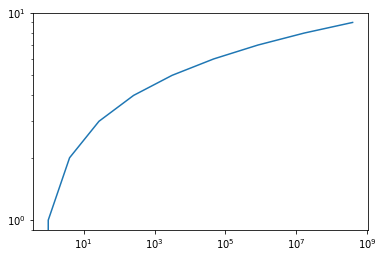

In [3]:
## simple test to make sure all of the plotting stuff is in here correctly
x = [x**x for x in range(10)]
y = [y for y in range(10)]
plt.loglog(x,y) # Whee the plot works

In [4]:
base_str = '../../datasets/movielens/'
movies = pd.read_csv('../../datasets/movielens/movies.csv')
ratings = pd.read_csv(base_str+'ratings.csv')
tags = pd.read_csv(base_str+'tags.csv')
movies.head()
print(movies.isnull().any())
print(movies.shape)
unique_movies = movies['movieId'].nunique()
movies.head()

In [8]:
# Check out the movie formats, null values, duplicate movie entries
print(movies['movieId'].nunique())

movieId    False
title      False
genres     False
dtype: bool
(27278, 3)
27278


In [22]:
#Create a index with movies and ratings
rated_movies = pd.merge(ratings, movies, on='movieId', how='inner')
rated_movies['parsed_time'] = pd.to_datetime(rated_movies['timestamp'], unit='s')
rated_movies.head()

,userId,movieId,rating,timestamp,title,genres,parsed_time
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy,2005-04-02 23:53:47
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy,1996-12-25 15:26:09
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy,1996-11-27 08:19:02
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy,1996-06-23 20:36:14
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy,1996-10-28 13:29:44


In [18]:
value_counts_by_id = rated_movies['movieId'].value_counts()
value_counts_by_id = value_counts_by_id.to_frame(name='count')
#value_counts_by_id = pd.DataFrame({'movieId':value_counts_by_id[0], 'count':value_counts_by_id[1]})

In [19]:
value_counts_by_id['movieId'] = value_counts_by_id.index

In [14]:
# select only movies that have greater than 100 reviews value_counts_by_id
relevant_counts = value_counts_by_id[value_counts_by_id['count'] >= 500]

In [15]:
len(relevant_counts)

4489

In [16]:
# now we join the relevant counts to the appropriate DataFrames
# we want to include a rated movie for every count that exists in relevant counts
movie_freq = pd.merge(rated_movies, relevant_counts, on="movieId", how='inner')

In [ ]:
movie_freq.head()

In [ ]:
movie_freq.shape

In [ ]:
movie_freq['count'].isnull().any()

In [ ]:
movie_freq.isnull().any()

In [ ]:
# lets check to see the number of unique movies
print("Before filtering: %s, after filtering %s" %(unique_movies, movie_freq['movieId'].nunique()))


In [ ]:
# time to split up the results by genre
# get all of the unique genres present in the dataset
movie = movie_freq['genres'][:25].str.split("|")

In [ ]:
# Thanks to Trostis on Kaggle for this one! 
# outputs the set of all genres in 
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()

In [ ]:
len(genres_unique)

In [ ]:
genres_unique.shape

In [ ]:
new